# Kalorimetrie Küchentischversuch - Wärmekapazität eines Behälters

Author: Hiab Berhane

Datum: 18.11.2023

Gruppe: 02

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

Wie verändert sich der Temperaturverlauf wenn man heißes Wasser zu kaltem Wasser hinzugibt und nach welcher Zeit verändert sich die Temperatur der Sensoren nicht mehr?

## Versuchsaufbau und Durchführung

Beschreiben Sie den Versuchsaufbau und die Versuchsdurchführung. Machen Sie ein Bild von Ihrem Aufbau und nutzen Sie dieses mit zur Beschreibung.


<img src="figures/Kapazität.JPG" width="800">
Ich habe zwei Glässer benutzt um genau die Wassermengen zu bestimmen, dann habe ich das kalte Wasser in eine Schüssel getan mit Sensor. Den anderen Sensor habe ich in das Glas mit dem heißen Wasser getan und dann das heiße Wasser in die Schuüssel mit dem kalten Wasser geschütet mit Sensor. Außerdem habe ich unter alles ein Handtuch getaan damit ich nix Nass mache um es so sicher wie möglich zu gestalten

## Versuchsauswertung

In [1]:
import numpy as np
from matplotlib import pyplot as plt
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib
import h5py as h5
from functions import m_json

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Wärmekapazität eines Behälters

Hinweis: Nutzen Sie die Funktionen *get_ids_from_setup* und *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [2]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.
path_experiment_capacity='/home/jovyan/work/calorimetry_home/archiv/heat_capacity_experiment/heat_capacity_experiment.h5'

# DONE #

In [3]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
# HINT: You can find information about how to access to H5 Files in the README of your Repo.
import h5py

file=h5py.File(path_experiment_capacity, 'r')
data=['authors','created','experiment','group_number']
information = []
for i in data:
    information.append(file.attrs[i])
    
temperature_sensor_1 = file['RawData']['sensors']['1ee83016-e13f-620f-baa5-40c3edeba894']['temperature'][()]
temperature_sensor_2 =file['RawData']['sensors']['1ee83018-8574-67a5-a64a-2eda8987157f']['temperature'][()]

timestamps_sensor_1 =file['RawData']['sensors']['1ee83016-e13f-620f-baa5-40c3edeba894']['timestamps'][()]
timestamps_sensor_2=file['RawData']['sensors']['1ee83018-8574-67a5-a64a-2eda8987157f']['timestamps'][()]

print(temperature_sensor_1)
print(temperature_sensor_2)
# DONE #

[18.1875 18.0625 17.9375 17.8125 17.6875 17.625  17.625  17.5625 17.5
 17.4375 17.4375 17.375  17.375  17.3125 17.25   17.25   17.25   17.1875
 17.25   17.1875 17.125  17.125  17.125  17.125  17.125  17.125  17.0625
 17.     17.     17.0625 17.0625 17.125  17.1875 17.125  20.     22.875
 24.4375 25.25   25.75   26.1875 26.5625 26.875  27.125  27.125  27.375
 27.375  27.5625 27.6875 27.6875 27.75   27.8125 27.9375 28.     28.
 28.0625 28.0625 28.0625 28.125  28.125  28.0625 28.0625 28.125  28.125
 28.1875 28.1875 28.1875 28.1875 28.1875 28.1875 28.1875 28.1875 28.1875
 28.125  28.0625 28.125  28.125  28.125  28.0625 28.0625 28.0625 28.0625
 28.0625 28.     28.     28.     27.9375 27.9375 27.9375 27.9375 27.9375
 27.875  27.875  27.9375 27.875  27.875  27.875  27.875  27.875  27.875
 27.875 ]
[35.     35.5625 36.0625 36.4375 36.4375 36.9375 37.3125 37.5    37.6875
 37.8125 37.9375 38.0625 38.1875 38.25   38.375  38.375  38.4375 38.5625
 38.5625 38.625  38.625  38.625  38.625  38.625  38.

#### (ii) Daten ploten

Text(0, 0.5, 'Temperatur in Grad Celsius')

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


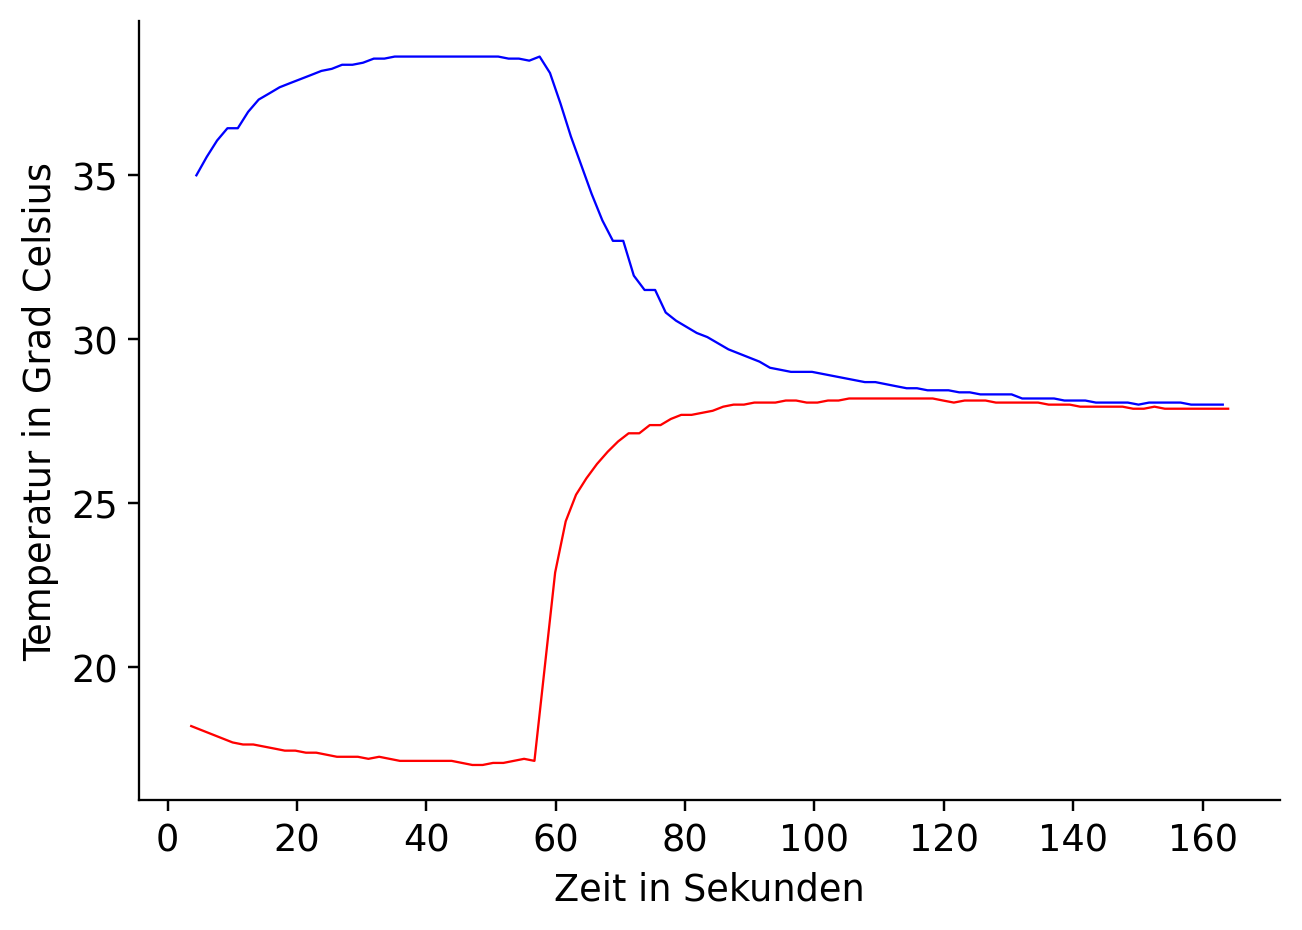

In [4]:
# TODO: Use the temperature and time data for plotting
plt.plot(timestamps_sensor_1,temperature_sensor_1, color='red')
plt.plot(timestamps_sensor_2,temperature_sensor_2, color ='blue')
plt.xlabel('Zeit in Sekunden')
plt.ylabel('Temperatur in Grad Celsius')

# DONE #

#### (iii) Metadaten auslesen

Die notwendigen Metadaten für die Berechnung der Wärmekapazität wird ausgelesen.

In [5]:
# Heat capacity of Water
water_heat_capa = 4.18

# TODO: Read mass from the metadata of the experiment.
data=m_json.get_metadata_from_setup('/home/jovyan/work/calorimetry_home/datasheets/setup_heat_capacity.json')
probe_heat_capacity =data['probe']['values'][0]
m_behälter_1=m_json.get_json_entry('datasheets', probe_heat_capacity, ['probe', 'metadata', 'mass_1'])
m_behälter_2=m_json.get_json_entry('datasheets', probe_heat_capacity, ['probe', 'metadata', 'mass_2'])
print (m_behälter_1)
print(m_behälter_2)
m_behälter_1=float(m_behälter_1)
m_behälter_2=float(m_behälter_2)
# DONE #

0.1
0.1


#### (iV) Anfangs- und Endwert der Temperatur

In [6]:
# TODO: Calculation of temperature data necessary to determine the specific heat capacity
T_1 = temperature_sensor_2[0]
T_2 = temperature_sensor_1[0]
T_M = (temperature_sensor_2[-1]+temperature_sensor_1[-1])/2

# DONE #

#### (V) Wärmekapazität bestimmen
$$
C = \frac{m_{add}c_{w}(T_2-T_M)}{T_M - T_1} - m_{cup}c_{w}
$$
Dabei ist $m_{add}$ die Masse vom hinzugefügten Wasser, $T_2$ ist seine Temperatur. Die Masse vom Wasser im Behälter ist $m_{cup}$ und seine Temperatur ist $T_1$. Die Mischungstemperatur ist $T_M$. Die spezifische Wärmekapazität von Wasser ist $c_w$.

In [7]:
# TODO: Calculate heat capacity of the calorimeter
C = (m_behälter_2*water_heat_capa*(T_2-T_M)/(T_M-T_1)-m_behälter_1*water_heat_capa)

# DONE #

#### (Vi) Ergebnis

In [8]:
# TODO: Print result
print(str(C) +'J/K')

# DONE #

0.1590619469026549J/K


## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.

Mein Wert aus dem Experiment beträgt ungefähr 0,16 Joule/Kelvin, dieser Wert ist anders als der in einem Literaturverzeichnis, was aber viele Ursachen haben kann. Der Sensor hat eine gewisse Ungenauigkeit, in meinem Zimmer war vielleicht die Heinzung stark aufgedereht weil es gerade Winter ist oder auch das Fenster war offen. Oder ich habe beim Durchführen des Experiments einen Fehler gemacht, da ich vor dem Mischen erst eine gewisse Zeit gewartet habe. All diese Faktoren sorgen für ein verfälschtes Ergebniss meiner Wärmekapazität.
Außerdem erkenne ich das nach ungefähr 140 sekunden die Temperatur der beiden Sensoren nicht mehr verändert.

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

Ich habe gelernt wie man mit einem Raspberry Pi umgeht und Gitlab, da diesem Versuch das pushen und pullen sehr wichtig war, auch wie man mit Sensoren umgeht und diese für kleinere Experimente anschließt.
Außerdem habe ich gelernt das man durch kleine Experimente das gelernte, also die Theorie schneller nachvollziehen kann als wenn man nur Text liest, durch die Anwendung des Experiments und der Implementierung des Graphen hat man direkt ein Ergebnis gesehen.